# An Analysis of the Arctic Basin



In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:34
🔁 Restarting kernel...


In [1]:
%%capture
!pip install gsw
!pip install netcdf4
# !apt-get install libproj-dev proj-bin proj-data
# !apt-get install libgeos-dev
# !pip uninstall -y shapely
# !pip install --no-binary shapely shapely
# !pip install cartopy
!apt-get install libgdal-dev texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [2]:
!mamba install -q -c conda-forge cartopy


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████

  Package              Version  Build                Channel                   Size
──────────────────────────────

In [3]:
import cartopy
cartopy.__version__

'0.21.1'

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import sys
sys.path.append('/content/drive/My Drive/')

import numpy as np
import xarray as xr
import gsw

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.titlesize'] = 20
%matplotlib inline

## December 2021: monthly mean SSH, SST and surface wind stress (northward and eastward)


In [6]:
### CMEMS DATA
sat_ds = xr.open_dataset('drive/My Drive/cmems_mod_arc_phy_my_topaz4_P1D-m_1673699734720.nc')
sithick = np.mean(sat_ds['sithick'][:,:,:], axis=0).T  
siconc = np.mean(sat_ds['siconc'][:,:,:], axis=0).T 
SST_sat = np.mean(sat_ds['thetao'][:,0,:,:], axis=0).T 
salinity = np.mean(sat_ds['so'][:,0,:,:], axis=0).T 
lon_ssh = sat_ds['longitude'][:]-360.0  # longitude
lat_ssh = sat_ds['latitude'][:]  # latitude

## Sea Ice Thickness and Coverage



/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


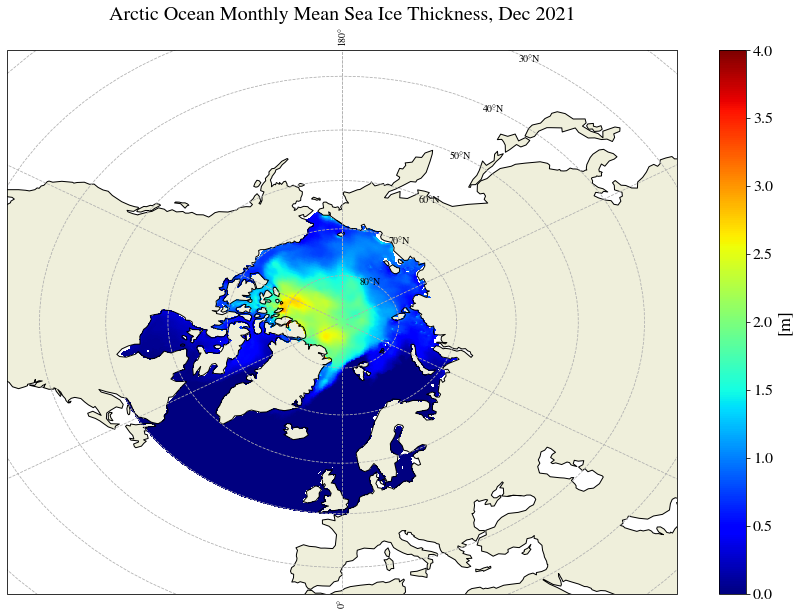

In [7]:
### PLOT Sea Ice Thickness: 0 to 7.2 m, mean: 0.53
plt.figure(figsize=(15.,10.))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
cmesh = ax.pcolormesh(lon_ssh.values, lat_ssh.values, sithick.T, cmap='jet', transform=ccrs.PlateCarree(), vmin=np.nanmin(sithick), vmax=4)
cbar = plt.colorbar(cmesh)
cbar.set_label('[m]')
ax.set_aspect('auto', adjustable=None)
plt.title('Arctic Ocean Monthly Mean Sea Ice Thickness, Dec 2021')
plt.show()

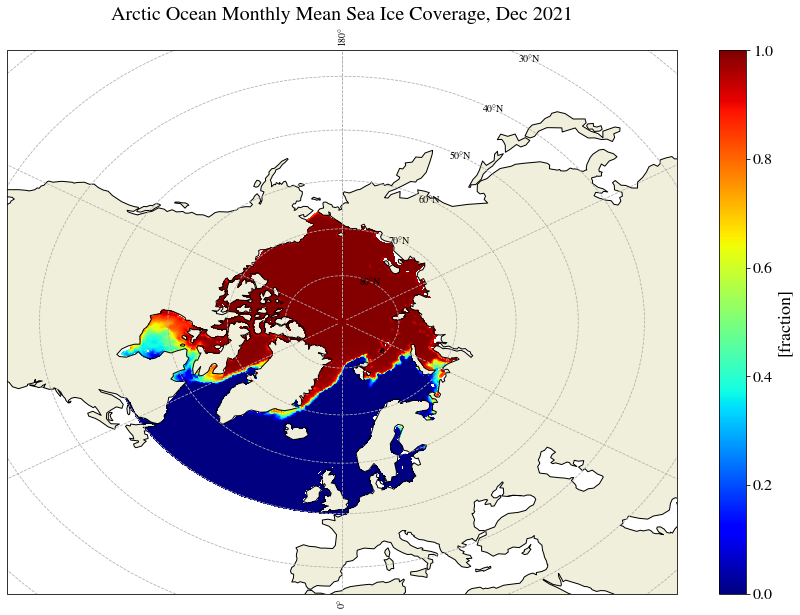

In [ ]:
### PLOT Sea Ice Coverage: 0 to 0.995, mean: 0.48
plt.figure(figsize=(15.,10.))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
cmesh = ax.pcolormesh(lon_ssh.values, lat_ssh.values, siconc.T, cmap='jet', transform=ccrs.PlateCarree(), vmin=0, vmax=1)
cbar = plt.colorbar(cmesh)
cbar.set_label('[fraction]')
ax.set_aspect('auto', adjustable=None)
plt.title('Arctic Ocean Monthly Mean Sea Ice Coverage, Dec 2021')
plt.show()

## SST

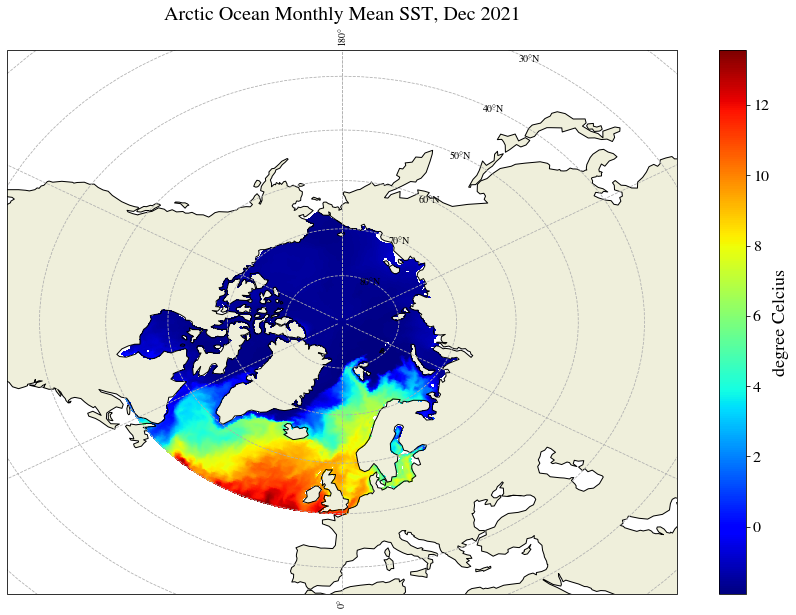

In [ ]:
### PLOT Sea Surface Temperature: -1.9 to 13.56 celcius, mean: 2.058
plt.figure(figsize=(15.,10.))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
cmesh = ax.pcolormesh(lon_ssh.values, lat_ssh.values, SST_sat.T, cmap='jet', transform=ccrs.PlateCarree(), vmin=np.nanmin(SST_sat), vmax=np.nanmax(SST_sat))
cbar = plt.colorbar(cmesh)
cbar.set_label('degree Celcius')
ax.set_aspect('auto', adjustable=None)
plt.title('Arctic Ocean Monthly Mean SST, Dec 2021')
plt.show()

The Arctic Ocean’s surface temperature is fairly constant, around the freezing point of seawater (below 0 degrees celcius, about -1.8$ ^\circ C $). The relatively warm ocean water has a moderating effect, even when covered by ice. This is one reason why the Arctic does not experience the extreme temperatures of the Antarctic.

## Salinity

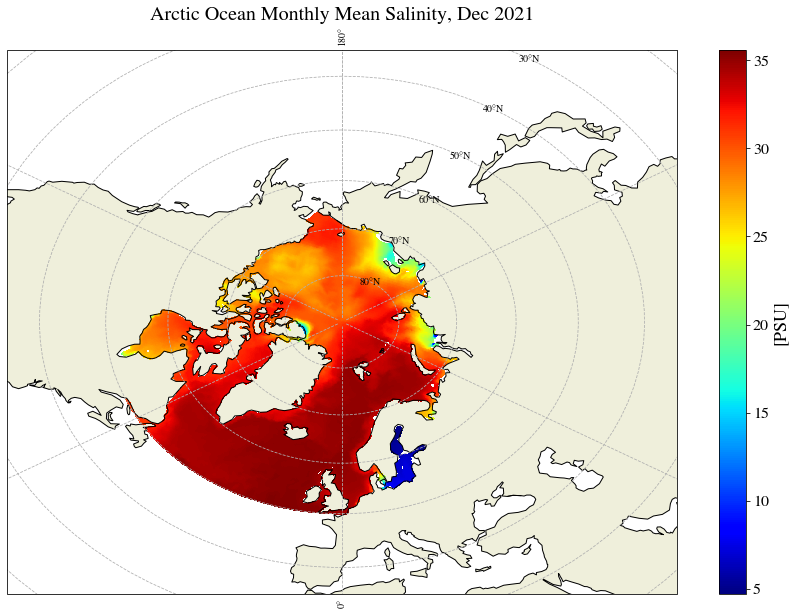

In [ ]:
### PLOT  4.73 to 35.6 psu, mean: 31.6
plt.figure(figsize=(15.,10.))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
cmesh = ax.pcolormesh(lon_ssh.values, lat_ssh.values, salinity.T, cmap='jet', transform=ccrs.PlateCarree(), vmin=np.nanmin(salinity), vmax=np.nanmax(salinity))
cbar = plt.colorbar(cmesh)
cbar.set_label('[PSU]')
ax.set_aspect('auto', adjustable=None)
plt.title('Arctic Ocean Monthly Mean Salinity, Dec 2021')
plt.show()

## SSH

In [8]:
sat_ds = xr.open_dataset('drive/My Drive/dataset-armor-3d-rep-monthly_1615775739706.nc')
SSH_sat = np.mean(sat_ds['zo'][:,0,:,:], axis=0).T  # Sea Surface Height
lon_ssh = sat_ds['longitude'][:]-360.0  # longitude
lat_ssh = sat_ds['latitude'][:]  # latitude

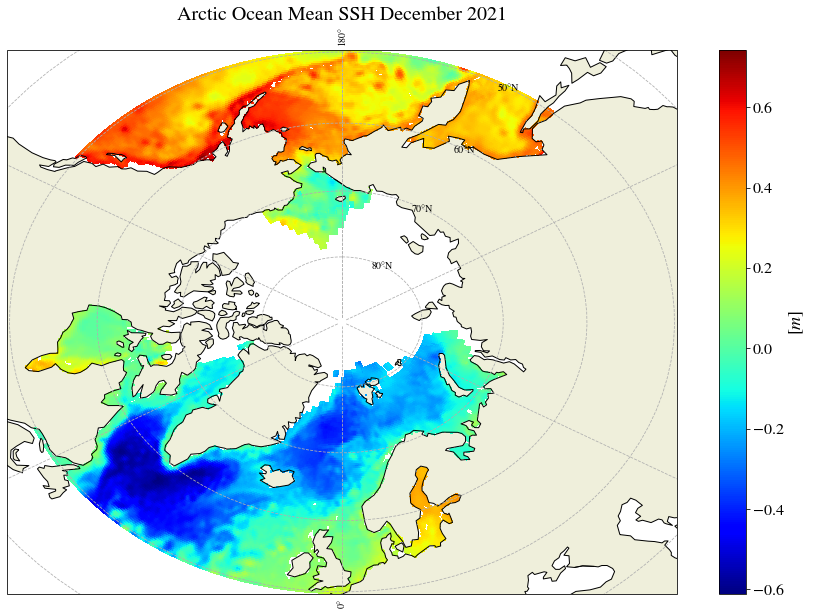

In [9]:
### PLOT Sea Surface Height: -0.61 to 0.74, mean: -0.016
plt.figure(figsize=(15.,10.))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
cmesh = ax.pcolormesh(lon_ssh.values, lat_ssh.values, SSH_sat.T, cmap='jet', transform=ccrs.PlateCarree(), vmin=np.nanmin(SSH_sat), vmax=np.nanmax(SSH_sat))
cbar = plt.colorbar(cmesh)
cbar.set_label('[$m$]')
ax.set_aspect('auto', adjustable=None)
plt.title('Arctic Ocean Mean SSH December 2021')
plt.show()

## Geostrophic Flow Zonal ($u_g$) and Meridional ($v_g$) Components

$$u_{g,surface}=\frac{g}{f}(- \frac {\partial \eta}{\partial y})$$

$$v_{g,surface}=\frac{g}{f}\frac {\partial \eta}{\partial x}$$

where $\eta$ is the sea surface height (m)

In [10]:
# grid spacing is 0.25 in degrees for both lat and lon
lat_1D = sat_ds['latitude'][:].values # size: 161
lon_1D = sat_ds['longitude'][:].values # size: 1440
lon, lat = np.meshgrid(lon_1D, lat_1D, indexing='ij')
Nx, Ny = lon.shape #1440*161
# Constants
Omega = 2*np.pi/86400  # Earth's angular velocity
deg2rad = np.pi/180  # conversion factor from degree to radian
R = 6371e3 # Earth's radius

# Grid spacing in the zonal and meridional directions in meters
dx = 0.25*np.pi*R*np.cos(deg2rad*lat_1D)/180
dy = 0.25*np.pi*R/180

f = 2*Omega*np.sin(deg2rad*lat_1D)
g = 9.81

detady = np.gradient(SSH_sat,dy,axis=1)
u_g = -(g/f)*detady
detadx = np.zeros((Nx,Ny)) #size:1440*161
for ky in range(Ny):
    detadx[:,ky] = np.gradient(SSH_sat[:,ky],dx[ky])
v_g = (g/f)*(detadx)

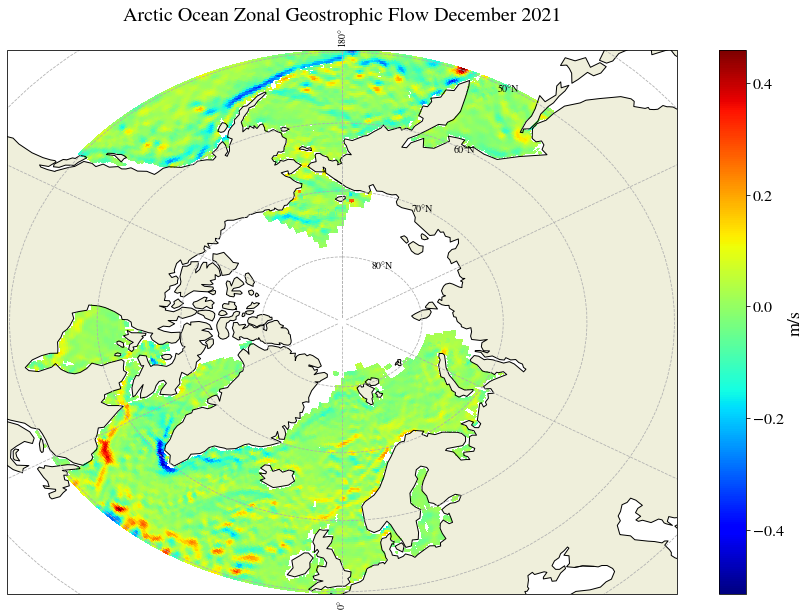

In [11]:
### PLOT Ug
plt.figure(figsize=(15.,10.))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
cmesh = ax.pcolormesh(lon,lat, u_g, cmap='jet', transform=ccrs.PlateCarree(), vmin=np.nanmin(u_g), vmax=np.nanmax(u_g)) # ug: 0.46 to -0.52, mean 0.0005
cbar = plt.colorbar(cmesh)
cbar.set_label('m/s')
ax.set_aspect('auto', adjustable=None)
plt.title('Arctic Ocean Zonal Geostrophic Flow December 2021')
plt.show()

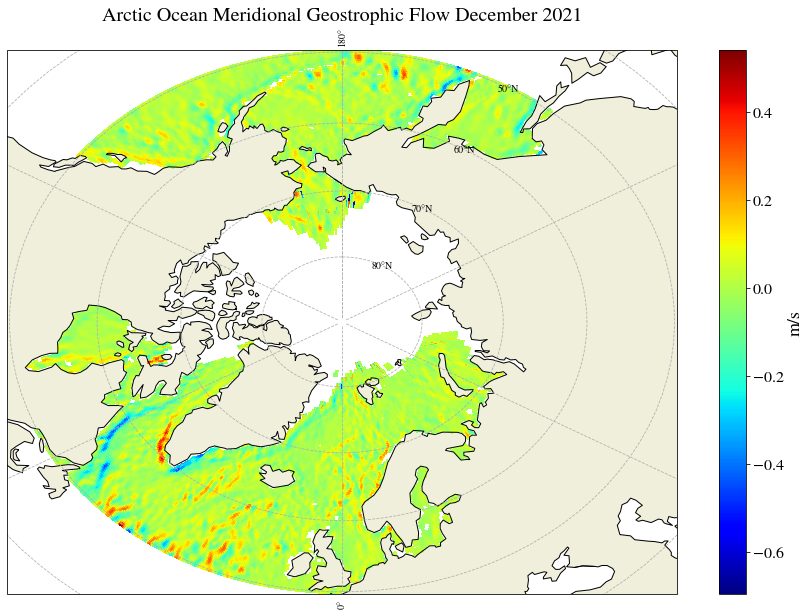

In [12]:
### PLOT Vg
plt.figure(figsize=(15.,10.))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
cmesh = ax.pcolormesh(lon, lat, v_g, cmap='jet', transform=ccrs.PlateCarree(), vmin=np.nanmin(v_g), vmax=np.nanmax(v_g)) # vg: 0.54 to -0.7, mean: 0.0045
cbar = plt.colorbar(cmesh)
cbar.set_label('m/s')
ax.set_aspect('auto', adjustable=None)
plt.title('Arctic Ocean Meridional Geostrophic Flow December 2021')
plt.show()

# Surface Wind Stress

In [13]:
ws_ds = xr.open_dataset('/content/drive/My Drive/CERSAT-GLO-BLENDED_WIND_L4-V6-OBS_FULL_TIME_SERIE_1615457238496.nc',decode_times=False)

# Get lat-lon grid
lon_1D = ws_ds['lon'][:].values-360
lat_1D = ws_ds['lat'][:].values
lon, lat = np.meshgrid(lon_1D, lat_1D, indexing='ij')
Nx, Ny = lon.shape

# Extract the Wind Stress
taux = np.nanmean(ws_ds['surface_downward_eastward_stress'][:,:,:].values,axis=0).T # max: 0.35; min: -0.35
tauy = np.nanmean(ws_ds['surface_downward_northward_stress'][:,:,:].values,axis=0).T # max:0.19 min:-0.54

<ipython-input-13-a4c2f2e4e1be>:10: RuntimeWarning: Mean of empty slice
  taux = np.nanmean(ws_ds['surface_downward_eastward_stress'][:,:,:].values,axis=0).T # max: 0.35; min: -0.35
<ipython-input-13-a4c2f2e4e1be>:11: RuntimeWarning: Mean of empty slice
  tauy = np.nanmean(ws_ds['surface_downward_northward_stress'][:,:,:].values,axis=0).T # max:0.19 min:-0.54


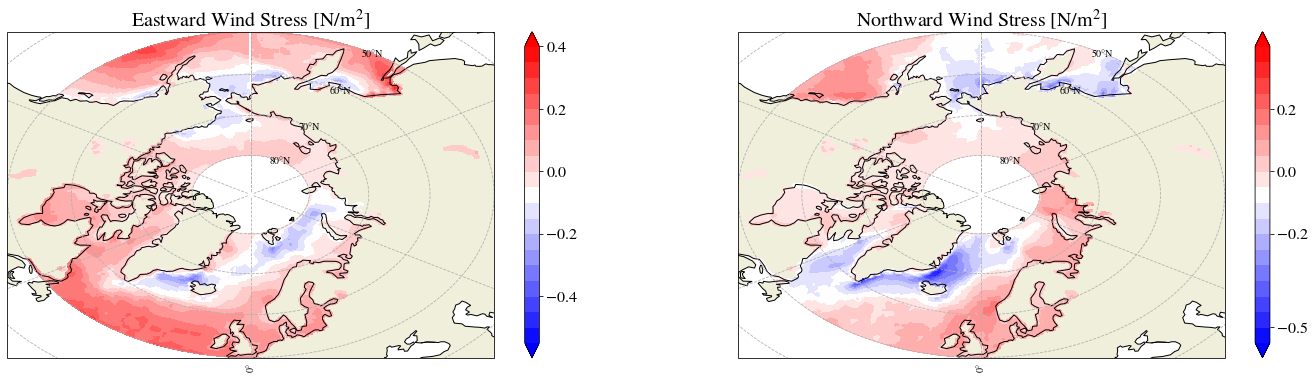

In [14]:
### PLOT
plt.figure(figsize=(24,6))

levs = np.linspace(-0.55, 0.4, 20)

ax = plt.subplot(1,2,1,projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cmesh = ax.contourf(lon, lat, taux, levs, cmap='bwr', transform=ccrs.PlateCarree(), extend='both')
cbar = plt.colorbar(cmesh, ticks=[-0.4, -0.2, 0, 0.2, 0.4])
ax.set_aspect('auto', adjustable=None)
plt.title('Eastward Wind Stress [N/m$^2$]')

ax = plt.subplot(1,2,2,projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cmesh = ax.contourf(lon, lat, tauy, levs, cmap='bwr', transform=ccrs.PlateCarree(), extend='both')
cbar = plt.colorbar(cmesh, ticks=[-0.5, -0.2, 0, 0.2])
ax.set_aspect('auto', adjustable=None)
plt.title('Northward Wind Stress [N/m$^2$]')

plt.show()

### Ekman Transport Zonal ($\mathbf{M}_{e,x}$) and Meridional ($\mathbf{M}_{e,y}$) Components

$$\mathbf{M}_{e,y}=\frac{\tau_{wind,x}}{f}$$

$$\mathbf{M}_{e,x}=\frac{\tau_{wind,y}}{f}$$

$$w_e=\frac{(\nabla \cdot \mathbf{M}_e)}{\rho_{ref}}= \frac{(\frac{d\mathbf{M}_{e,x}}{dx}+\frac{d\mathbf{M}_{e,y}}{dy})}{\rho_{ref}}$$

In [15]:
# Constants
Omega = 2*np.pi/86400  # Earth's angular velocity
rho_ref = 1000.  # reference density
deg2rad = np.pi/180  # conversion factor from degree to radian
R = 6371e3 # Earth's radius

# Grid spacing in the zonal and meridional directions in meters
dx = 0.25*np.pi*R*np.cos(deg2rad*lat_1D)/180
dy = 0.25*np.pi*R/180

# Calculate the Ekman transport in each direction
f = 2*Omega*np.sin(deg2rad*lat_1D)
Mx = tauy/f # Eastward transport: 1470 to -3853
My = -taux/f # Northward transport: 1907 to -3192

# Calculate the corresponding Ekman Vertical velocity in m/day
dMxdx = np.zeros((Nx,Ny)) 
for ky in range(Ny):
    dMxdx[:,ky] = np.gradient(Mx[:,ky],dx[ky])
dMydy = np.gradient(My,dy,axis=1)
we = (1/rho_ref)*(dMxdx+dMydy)*86400 # m/d

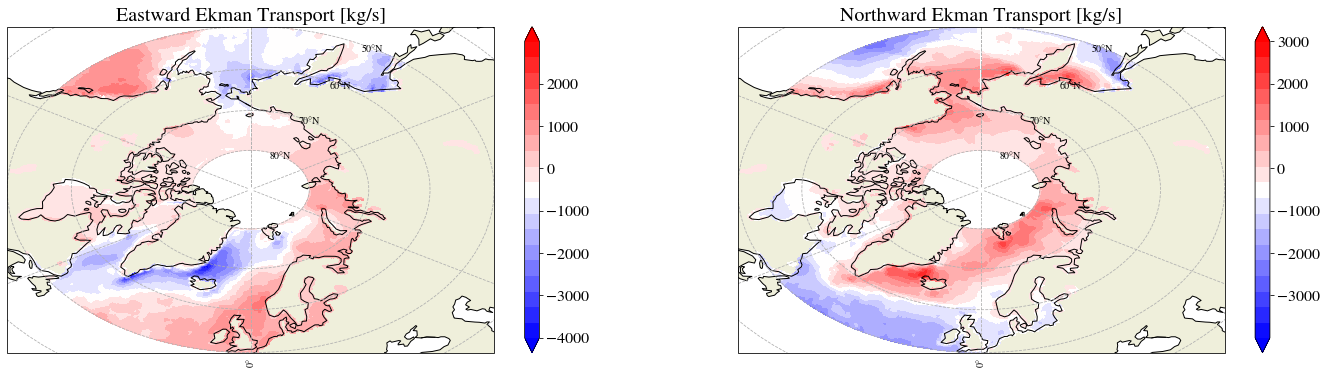

In [24]:
plt.figure(figsize=(24,6))

levs = np.linspace(-4000, 3000, 20)

ax = plt.subplot(1,2,1,projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cmesh = ax.contourf(lon, lat, Mx, levs, cmap='bwr', transform=ccrs.PlateCarree(), extend='both') # 1498 to -3984, mean: -247 
cbar = plt.colorbar(cmesh, ticks=[-4000, -3000, -2000, -1000, 0, 1000, 2000])
ax.set_aspect('auto', adjustable=None)
plt.title('Eastward Ekman Transport [kg/s]')

ax = plt.subplot(1,2,2,projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cmesh = ax.contourf(lon, lat, My, levs, cmap='bwr', transform=ccrs.PlateCarree(), extend='both') # 2669 to -2986, mean: -37
cbar = plt.colorbar(cmesh, ticks=[-3000, -2000, -1000, 0, 1000, 2000, 3000])
ax.set_aspect('auto', adjustable=None)
plt.title('Northward Ekman Transport [kg/s]')

plt.show()

### Ekman Pumping/Suction: Vertical Ekman Velocity ($w_e$)

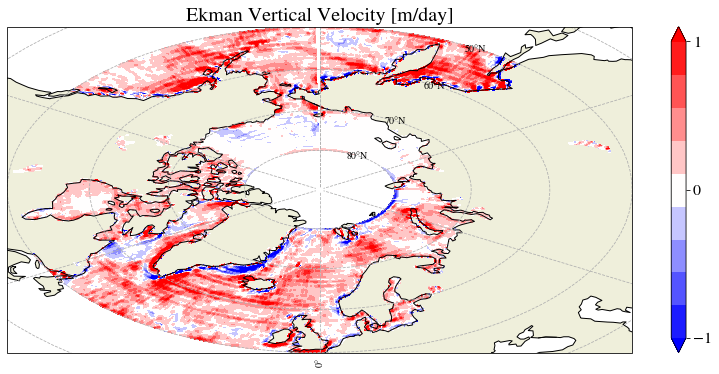

In [17]:
### PLOT We (m/d)
plt.figure(figsize=(14.,6.))
levs = np.linspace(-1, 1, 10)
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cmesh = ax.contourf(lon, lat, we, levs, cmap='bwr', transform=ccrs.PlateCarree(), extend='both') # 11.2 to -9.51, mean: 0.07
cbar = plt.colorbar(cmesh, ticks=[-1, 0, 1])
ax.set_aspect('auto', adjustable=None)
#ax.quiver(lon, lat, taux, tauy, width=0.002, scale=10)
plt.title('Ekman Vertical Velocity [m/day]')
plt.show()